# Lesson 3

In [2]:
# Paths
import pathlib

MAIN_PATH = pathlib.Path().resolve()
DATA_PATH = MAIN_PATH / "notebooks" / "lessons" / "lesson-3" / "data"
SAVE_DIRECTORY = MAIN_PATH / "lesson-3"

In [4]:
# Read the addresses file
import pandas

addresses = pandas.read_csv(DATA_PATH / "helsinki_addresses" / "addresses.txt",
    sep=";"
)

addresses.head()

,id,addr
0,1000,"Itämerenkatu 14, 00101 Helsinki, Finland"
1,1001,"Kampinkuja 1, 00100 Helsinki, Finland"
2,1002,"Kaivokatu 8, 00101 Helsinki, Finland"
3,1003,"Hermannin rantatie 1, 00580 Helsinki, Finland"
4,1005,"Tyynenmerenkatu 9, 00220 Helsinki, Finland"


In [5]:
# use Nominatim geocoding service
import geopandas

geocoded_addresses = geopandas.tools.geocode(
    addresses["addr"],
    provider="nominatim",
    user_agent="autogis2022",
    timeout=10
)
geocoded_addresses.head()

C:\Users\PC\AppData\Local\Temp\ipykernel_3768\2244673523.py:2: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas


,geometry,address
0,POINT (24.91556 60.16320),"Ruoholahti, 14, Itämerenkatu, Ruoholahti, Läns..."
1,POINT (24.93166 60.16905),"Kamppi, 1, Kampinkuja, Kamppi, Eteläinen suurp..."
2,POINT (24.94168 60.16996),"Bangkok9, 8, Kaivokatu, Keskusta, Kluuvi, Etel..."
3,POINT (24.97783 60.18892),"Hermannin rantatie, Verkkosaari, Kalasatama, S..."
4,POINT (24.92151 60.15662),"9, Tyynenmerenkatu, Jätkäsaari, Länsisatama, E..."


In [6]:
# Join the two dataframes by index

geocoded_addresses_with_id = geocoded_addresses.join(addresses)
geocoded_addresses_with_id.head()

,geometry,address,id,addr
0,POINT (24.91556 60.16320),"Ruoholahti, 14, Itämerenkatu, Ruoholahti, Läns...",1000,"Itämerenkatu 14, 00101 Helsinki, Finland"
1,POINT (24.93166 60.16905),"Kamppi, 1, Kampinkuja, Kamppi, Eteläinen suurp...",1001,"Kampinkuja 1, 00100 Helsinki, Finland"
2,POINT (24.94168 60.16996),"Bangkok9, 8, Kaivokatu, Keskusta, Kluuvi, Etel...",1002,"Kaivokatu 8, 00101 Helsinki, Finland"
3,POINT (24.97783 60.18892),"Hermannin rantatie, Verkkosaari, Kalasatama, S...",1003,"Hermannin rantatie 1, 00580 Helsinki, Finland"
4,POINT (24.92151 60.15662),"9, Tyynenmerenkatu, Jätkäsaari, Länsisatama, E...",1005,"Tyynenmerenkatu 9, 00220 Helsinki, Finland"


In [7]:
type(geocoded_addresses_with_id)

geopandas.geodataframe.GeoDataFrame

In [8]:
# Save the output
geocoded_addresses.to_file(SAVE_DIRECTORY / "addresses.gpkg")

## Point-in-polygon queries

In [9]:
import shapely.geometry
# Create two points
point1 = shapely.geometry.Point(24.952242, 60.1696017)
point2 = shapely.geometry.Point(24.976567, 60.1612500)

# and a polygon
polygon = shapely.geometry.Polygon(
    [
        (24.950899, 60.169158),
        (24.953492, 60.169158),
        (24.953510, 60.170104),
        (24.950958, 60.169990)
    ]
)

print(point1)
print(point2)
print(polygon)

POINT (24.952242 60.1696017)
POINT (24.976567 60.16125)
POLYGON ((24.950899 60.169158, 24.953492 60.169158, 24.95351 60.170104, 24.950958 60.16999, 24.950899 60.169158))


In [10]:
# Check if the points are within() the polygon
print(point1.within(polygon))
print(point2.within(polygon))

True
False


In [11]:
# Check if the polygon contains() the points
print(polygon.contains(point1))
print(polygon.contains(point2))

True
False


In [13]:
# Paths
import pathlib
MAIN_PATH = pathlib.Path().resolve()
DATA_DIRECTORY = MAIN_PATH / "notebooks" / "lessons" / "lesson-3" / "data"
SAVE_DIRECTORY = MAIN_PATH / "lesson-3"

# Import data
import geopandas
city_districts = geopandas.read_file(
    DATA_DIRECTORY / "helsinki_city_districts" / "helsinki_city_districts_2021.gpkg"
)
city_districts.head()

,name,geometry
0,Eteläinen,"POLYGON ((24.78280 60.09996, 24.80437 60.07607..."
1,Läntinen,"POLYGON ((24.83140 60.25406, 24.83168 60.25321..."
2,Keskinen,"POLYGON ((24.93345 60.18317, 24.93502 60.18005..."
3,Pohjoinen,"POLYGON ((24.90081 60.23526, 24.89944 60.23500..."
4,Koillinen,"POLYGON ((24.97163 60.24253, 24.97163 60.24246..."


<AxesSubplot: >

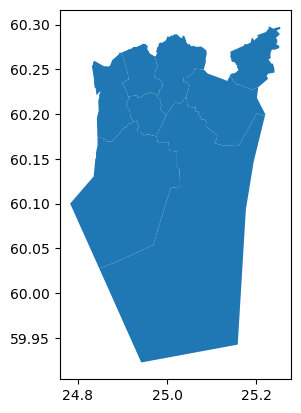

In [14]:
city_districts.plot()

In [15]:
# separete one district
southern_district = city_districts[city_districts.name == "Eteläinen"]
southern_district

,name,geometry
0,Eteläinen,"POLYGON ((24.78280 60.09996, 24.80437 60.07607..."


In [16]:
# load the addresses from before
addresses = geopandas.read_file(SAVE_DIRECTORY / "addresses.gpkg")
addresses.head()

,address,geometry
0,"Ruoholahti, 14, Itämerenkatu, Ruoholahti, Läns...",POINT (24.91556 60.16320)
1,"Kamppi, 1, Kampinkuja, Kamppi, Eteläinen suurp...",POINT (24.93166 60.16905)
2,"Bangkok9, 8, Kaivokatu, Keskusta, Kluuvi, Etel...",POINT (24.94168 60.16996)
3,"Hermannin rantatie, Verkkosaari, Kalasatama, S...",POINT (24.97783 60.18892)
4,"9, Tyynenmerenkatu, Jätkäsaari, Länsisatama, E...",POINT (24.92151 60.15662)


<AxesSubplot: >

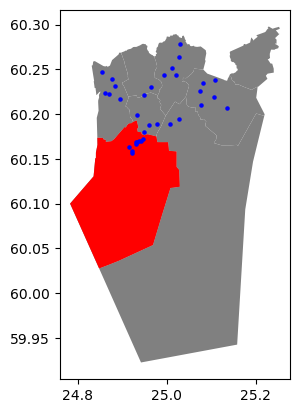

In [17]:
# Ploting multiple map layers

axes = city_districts.plot(facecolor="grey")
southern_district.plot(ax = axes, facecolor="red")
addresses.plot(ax=axes, color="blue", markersize=5)

In [21]:
# Check what points are in the southern district polygon
addresses.within(southern_district.at[0,"geometry"])

0      True
1      True
2      True
3     False
4      True
5     False
6     False
7     False
8     False
9     False
10     True
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30     True
31     True
32     True
33     True
dtype: bool

In [22]:
addresses_in_southern_district = addresses[
    addresses.within(southern_district.at[0,"geometry"])
                     ]
addresses_in_southern_district

,address,geometry
0,"Ruoholahti, 14, Itämerenkatu, Ruoholahti, Läns...",POINT (24.91556 60.16320)
1,"Kamppi, 1, Kampinkuja, Kamppi, Eteläinen suurp...",POINT (24.93166 60.16905)
2,"Bangkok9, 8, Kaivokatu, Keskusta, Kluuvi, Etel...",POINT (24.94168 60.16996)
4,"9, Tyynenmerenkatu, Jätkäsaari, Länsisatama, E...",POINT (24.92151 60.15662)
10,"Metro Rautatientori D, 1, Simonkatu, Kamppi, E...",POINT (24.93774 60.16975)
30,"Kampin keskus, 1, Urho Kekkosen katu, Kamppi, ...",POINT (24.93312 60.16909)
31,"Ruoholahdenkatu, Hietalahti, Kamppi, Eteläinen...",POINT (24.93028 60.16650)
32,"3, Tyynenmerenkatu, Jätkäsaari, Länsisatama, E...",POINT (24.92121 60.15878)
33,"Oluthuone Kaisla, 4, Vilhonkatu, Kaisaniemi, K...",POINT (24.94709 60.17191)


<AxesSubplot: >

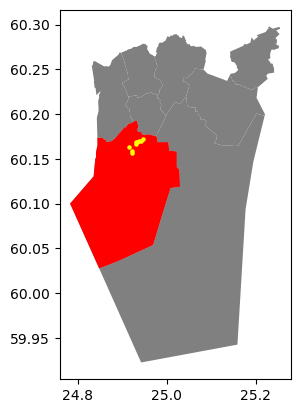

In [23]:
#Ploting only the selected points
axes = city_districts.plot(color="grey")
southern_district.plot(ax=axes, color="red")
addresses_in_southern_district.plot(ax=axes, color="yellow", markersize=5)

## Intersect

In [25]:
import shapely.geometry

line1 = shapely.geometry.LineString([(0, 0), (1, 1)])
line2 = shapely.geometry.LineString([(1, 1), (0, 2)])

In [27]:
# Do the lines intersect
line1.intersects(line2)

True

In [28]:
# and to they touch
line1.touches(line2)

True

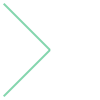

In [35]:
# To make it possible to represent both in Jupyter
shapely.geometry.MultiLineString([line1, line2])

## Spacial join

In [1]:
# Paths
import pathlib
MAIN_PATH = pathlib.Path().resolve()
DATA_DIRECTORY = MAIN_PATH / "notebooks" / "lessons" / "lesson-3" / "data"
SAVE_DIRECTORY = MAIN_PATH / "lesson-3"

# Import data
import geopandas

addresses = geopandas.read_file(SAVE_DIRECTORY / "addresses.gpkg")

population_grid = geopandas.read_file(
    (
        "https://kartta.hsy.fi/geoserver/wfs"
        "?service=wfs"
        "&version=2.0.0"
        "&request=GetFeature"
        "&typeName=asuminen_ja_maankaytto:Vaestotietoruudukko_2020"
        "&srsName=EPSG:3879"
    ),
)
population_grid.crs = crs="EPSG:3879"  # for WFS data, the CRS needs to be specified manually

C:\Users\PC\AppData\Local\Temp\ipykernel_8384\33916747.py:8: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas


In [3]:
population_grid.head()

,gml_id,index,asukkaita,asvaljyys,ika0_9,ika10_19,ika20_29,ika30_39,ika40_49,ika50_59,ika60_69,ika70_79,ika_yli80,geometry
0,Vaestotietoruudukko_2020.1,703,5,51,99,99,99,99,99,99,99,99,99,"POLYGON ((25472499.995 6685998.998, 25472499.9..."
1,Vaestotietoruudukko_2020.2,710,8,44,99,99,99,99,99,99,99,99,99,"POLYGON ((25472499.995 6684249.004, 25472499.9..."
2,Vaestotietoruudukko_2020.3,711,5,90,99,99,99,99,99,99,99,99,99,"POLYGON ((25472499.995 6683999.005, 25472499.9..."
3,Vaestotietoruudukko_2020.4,715,13,34,99,99,99,99,99,99,99,99,99,"POLYGON ((25472499.995 6682998.998, 25472499.9..."
4,Vaestotietoruudukko_2020.5,848,5,53,99,99,99,99,99,99,99,99,99,"POLYGON ((25472749.993 6690249.003, 25472749.9..."


In [2]:
# Remove unnecessary columns
population_grid = population_grid[["asukkaita", "geometry"]]
# and rename them
population_grid = population_grid.rename(columns={"asukkaita": "population"})

# Calculate the population density
population_grid["density"] = (
    population_grid["population"]
    / (population_grid.area / 1_000_000)
)

population_grid.head()

,population,geometry,density
0,5,"POLYGON ((25472499.995 6685998.998, 25472499.9...",80.001048
1,8,"POLYGON ((25472499.995 6684249.004, 25472499.9...",128.001677
2,5,"POLYGON ((25472499.995 6683999.005, 25472499.9...",80.001048
3,13,"POLYGON ((25472499.995 6682998.998, 25472499.9...",208.002724
4,5,"POLYGON ((25472749.993 6690249.003, 25472749.9...",79.998352


### Join input layers

In [3]:
# Verify if both geodf have the same cartographic refecence system
assert addresses.crs == population_grid.crs #They are not identical!!!

AssertionError: 

In [4]:
population_grid = population_grid.to_crs(addresses.crs)
assert addresses.crs == population_grid.crs

In [5]:
# Spacial join

addresses_with_population_data = addresses.sjoin(
    population_grid,
    how="left",
    predicate="within"
)
addresses_with_population_data

,address,geometry,index_right,population,density
0,"Ruoholahti, 14, Itämerenkatu, Ruoholahti, Läns...",POINT (24.91556 60.16320),3247.0,492.0,7872.103107
1,"Kamppi, 1, Kampinkuja, Kamppi, Eteläinen suurp...",POINT (24.93166 60.16905),3362.0,182.0,2912.038141
2,"Bangkok9, 8, Kaivokatu, Keskusta, Kluuvi, Etel...",POINT (24.94168 60.16996),3485.0,45.0,720.009431
3,"Hermannin rantatie, Verkkosaari, Kalasatama, S...",POINT (24.97783 60.18892),3824.0,686.0,10976.143763
4,"9, Tyynenmerenkatu, Jätkäsaari, Länsisatama, E...",POINT (24.92151 60.15662),3293.0,1410.0,22559.535398
5,"18, Kontulantie, Kontula, Mellunkylä, Itäinen ...",POINT (25.08174 60.23522),5036.0,48.0,768.010059
6,"Itäväylä, Vartioharju, Vartiokylä, Itäinen suu...",POINT (25.10651 60.21957),5339.0,99.0,1584.020747
7,"Tapulikaupungintie, Tapulikaupunki, Suutarila,...",POINT (25.02948 60.27858),4280.0,238.0,3807.921578
8,"Sompionpolku, Fallkullan kiila, Tapanila, Tapa...",POINT (25.02867 60.26370),4287.0,277.0,4431.908727
9,"Sodexo, 5, Atomitie, Strömberg, Pitäjänmäen te...",POINT (24.87103 60.22250),NaN,NaN,NaN


Text(0.5, 1.0, 'Population density around address points')

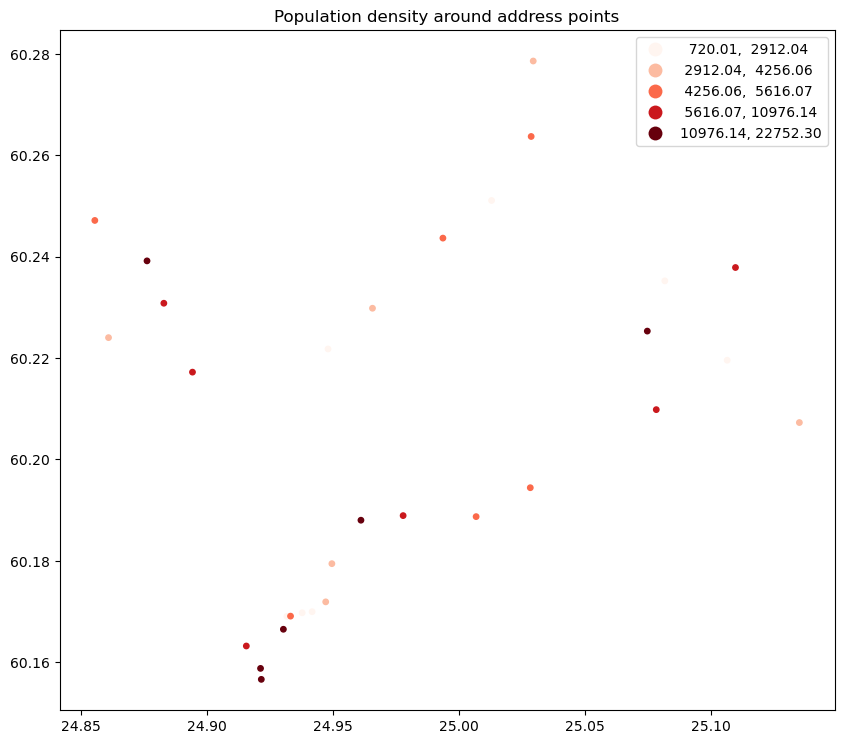

In [7]:
ax = addresses_with_population_data.plot(
    figsize=(10, 10),
    column="density",
    cmap="Reds",
    scheme="quantiles",
    markersize=15,
    legend=True
)
ax.set_title("Population density around address points")

Text(0.5, 1.0, 'Population density in the Helsinki metropolitan area')

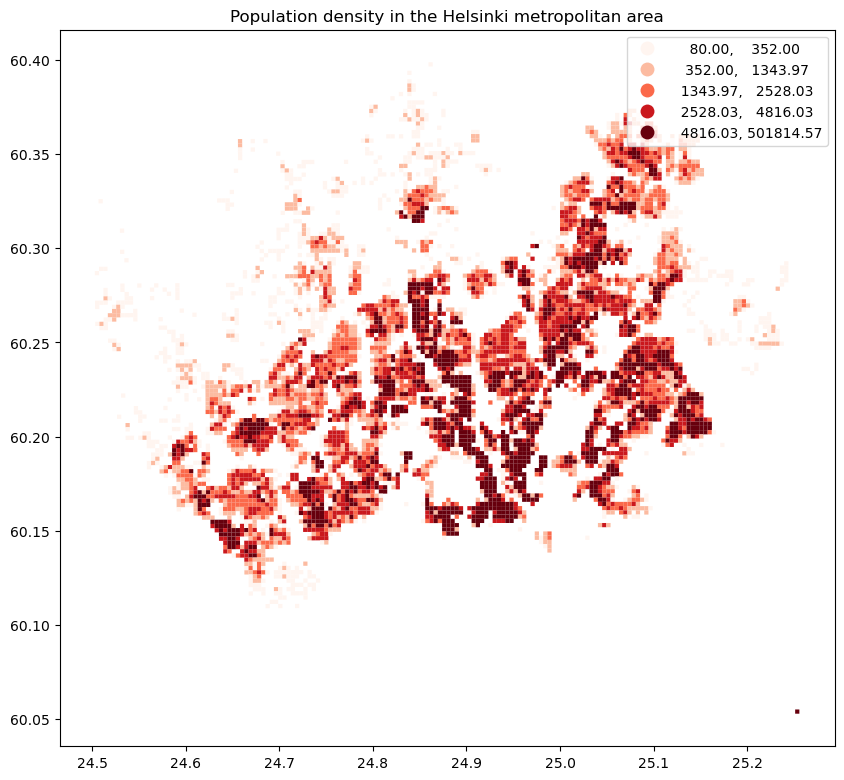

In [9]:
ax = population_grid.plot(
    figsize=(10, 10),
    column="density",
    cmap="Reds",
    scheme="quantiles",
    legend=True
)
ax.set_title("Population density in the Helsinki metropolitan area")

In [10]:
# Save file
addresses_with_population_data.to_file(
    SAVE_DIRECTORY / "addresses2.gpkg",
    layer="addresses_with_population_data"
)